This is my first attempt at trying to perform preprocessing on PPG data to get clean values. This dataset was obtained [**here**](https://www.kaggle.com/datasets/krishd123/ppg-collection-for-cognitive-strain).

In [2]:
# Handling initial imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from scipy.signal import hilbert
from pyemd import EMD

In [3]:
# Reading data from low and high workload files for Patient 2
data_file_low = pd.read_csv("Data\PPG for Cognitive Strain\Low_MWL\Low_MWL\p2l.csv")
print(data_file_low)

data_file_high = pd.read_csv("Data\PPG for Cognitive Strain\High_MWL\High_MWL\p2h.csv")
print(data_file_high)

       Trial 1:0back  Trial 6:0back
0             32.862         34.755
1             32.839         34.676
2             32.838         34.597
3             32.861         34.517
4             32.910         34.436
...              ...            ...
76795         38.499         33.383
76796         38.439         33.416
76797         38.381         33.467
76798         38.326         33.538
76799         38.276         33.631

[76800 rows x 2 columns]
       Trial 3:3back  Trial 5:3back
0             35.228         35.968
1             35.194         35.932
2             35.158         35.901
3             35.120         35.875
4             35.080         35.853
...              ...            ...
76795         34.093         35.634
76796         34.097         35.599
76797         34.105         35.562
76798         34.118         35.525
76799         34.137         35.489

[76800 rows x 2 columns]


Text(0.5, 1.0, 'PPG Signal 1: Low Workload')

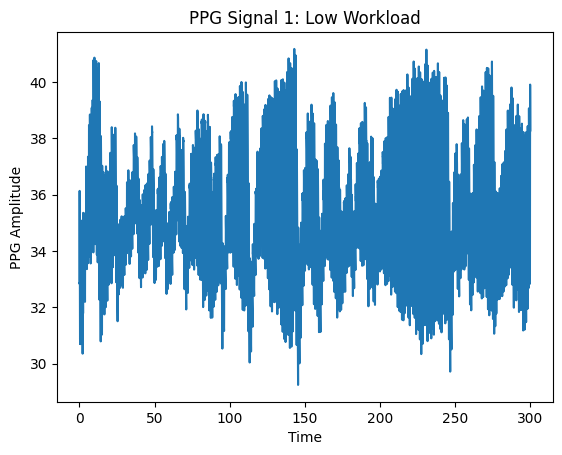

In [4]:
#Extracting Low PPG Signal
signal_low = data_file_low['Trial 1:0back']

#Setting sampling rate to 256 Hz
sampling_rate = 256

#Creating a time array based on the sampling rate and length of PPG values
time = np.arange(len(signal_low))/sampling_rate

#Plot the PPG over time
plt.plot(time, signal_low)
plt.xlabel("Time")
plt.ylabel("PPG Amplitude")
plt.title("PPG Signal 1: Low Workload")

Text(0.5, 1.0, 'PPG Signal 2: High Workload')

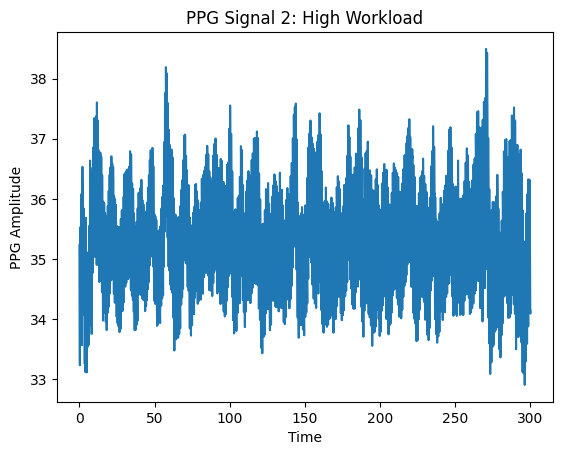

In [5]:
#Extracting High PPG Signal
signal_high = data_file_high['Trial 3:3back']

#Plot the PPG over time
plt.plot(time, signal_high)
plt.xlabel("Time")
plt.ylabel("PPG Amplitude")
plt.title("PPG Signal 2: High Workload")

In [8]:
#Selecting column 1 of the dataframe and 768 rows of data
column_1_low = data_file_low['Trial 1:0back'].iloc[0:768]
signal_1 = column_1_low.values
time_series = np.arange(len(column_1_low))/sampling_rate

#Computing Intrinsic Mode Functions using EMD
config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
emd = EMD(**config)
imfs = emd(signal_1, max_imf=7)
print('imfs = ' + f'{imfs.shape[0]:4d}')
dt = time_series[0] - time_series[1]

imfs =    5


In [9]:
# Extract analytical signal thorugh Hilbert Transformations
def instant_phase(imfs):
    analytic_signal = hilbert(imfs)
    phase = np.unwrap(np.angle(analytic_signal))
    return phase

# Extract instantaneous phases and frequencies using the Hilbert Transform
instant_phases = instant_phase(imfs)
instant_freqs = np.diff(instant_phases)/(2*np.pi*dt)

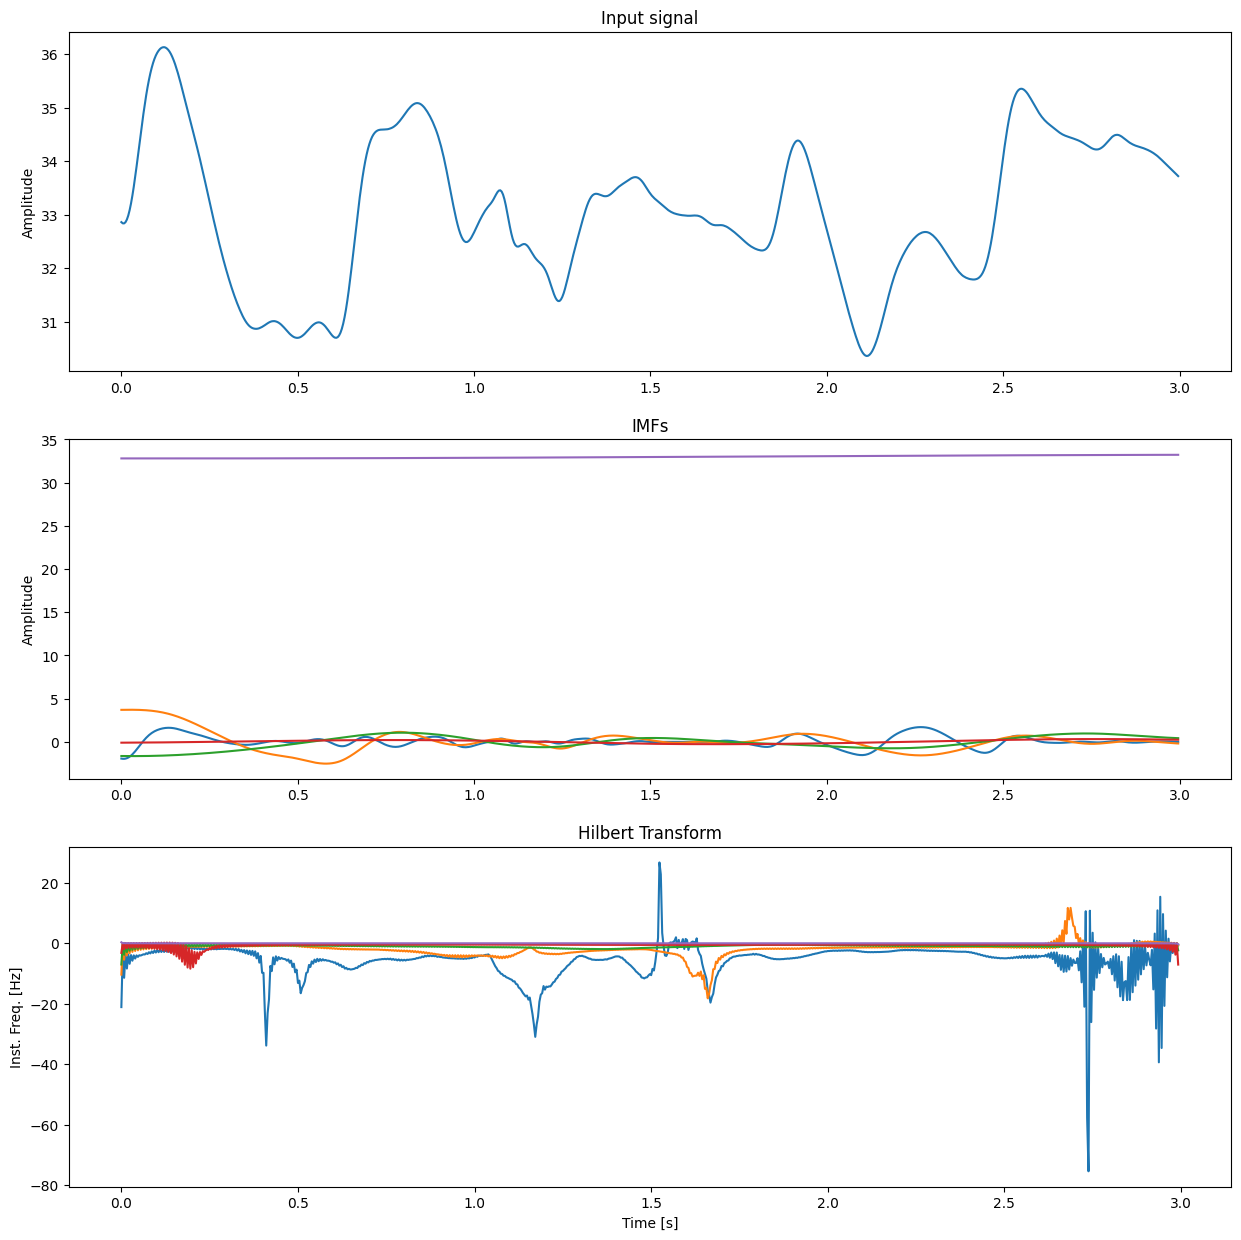

In [12]:
#Create a 3 panel figure showing the input signal, all IMFs, and instantaneous frequencies
fig, axes = plt.subplots(3, figsize = (15,15))

#Input Signal
ax = axes[0]
ax.plot(time_series, signal_1)
ax.set_ylabel("Amplitude")
ax.set_title("Input signal")

#All IMFs
ax = axes[1]
for num, imf in enumerate(imfs):
    ax.plot(time_series, imf, label='IMF %s' %(num + 1))
ax.set_ylabel("Amplitude") 
ax.set_title("IMFs")

#All instantaneous frequencies
ax = axes[2]
for num, instant_freq in enumerate (instant_freqs):
    ax.plot(time_series[:-1], instant_freq, label = 'Freq %s' %(num + 1))   
ax.set_xlabel("Time [s]")
ax.set_ylabel("Inst. Freq. [Hz]")
ax.set_title("Hilbert Transform")

plt.show()

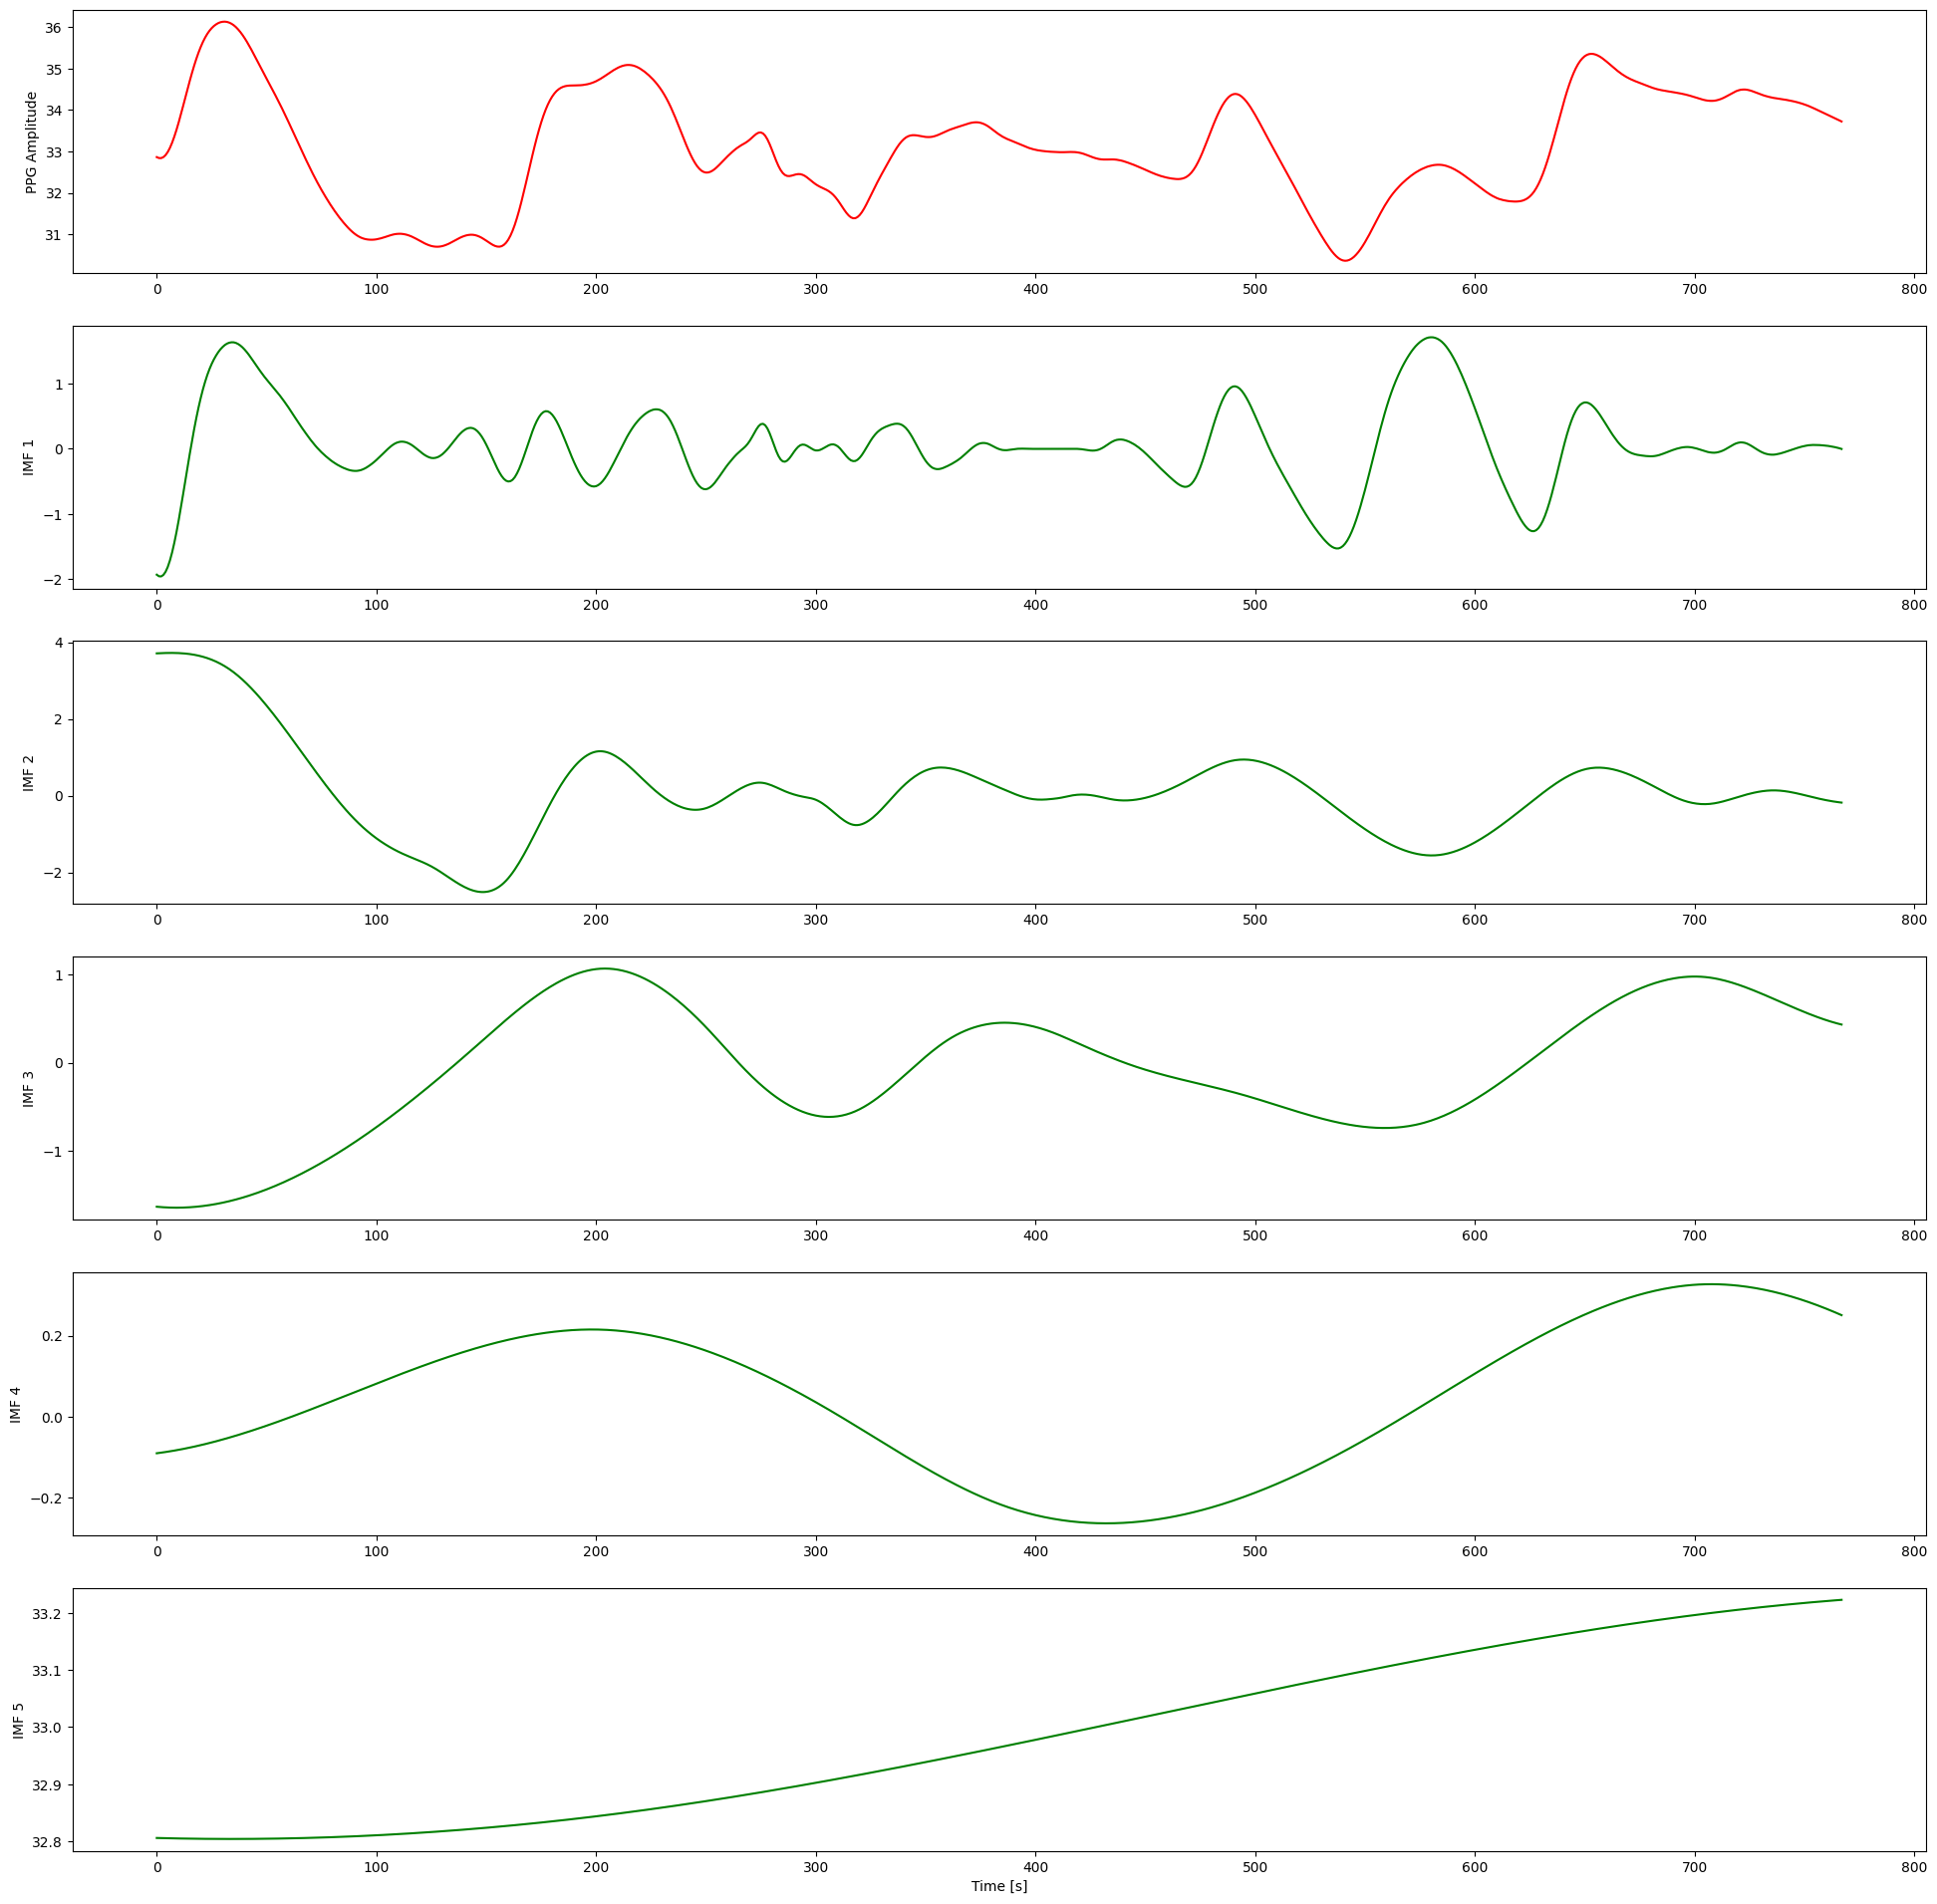

In [13]:
# Plotting all the IMFs alongside the input signal
nIMFs = imfs.shape[0]
plt.figure(figsize=(24,24))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(signal_1, 'r')
plt.ylabel('PPG Amplitude')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(imfs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.show()

imfs =    4


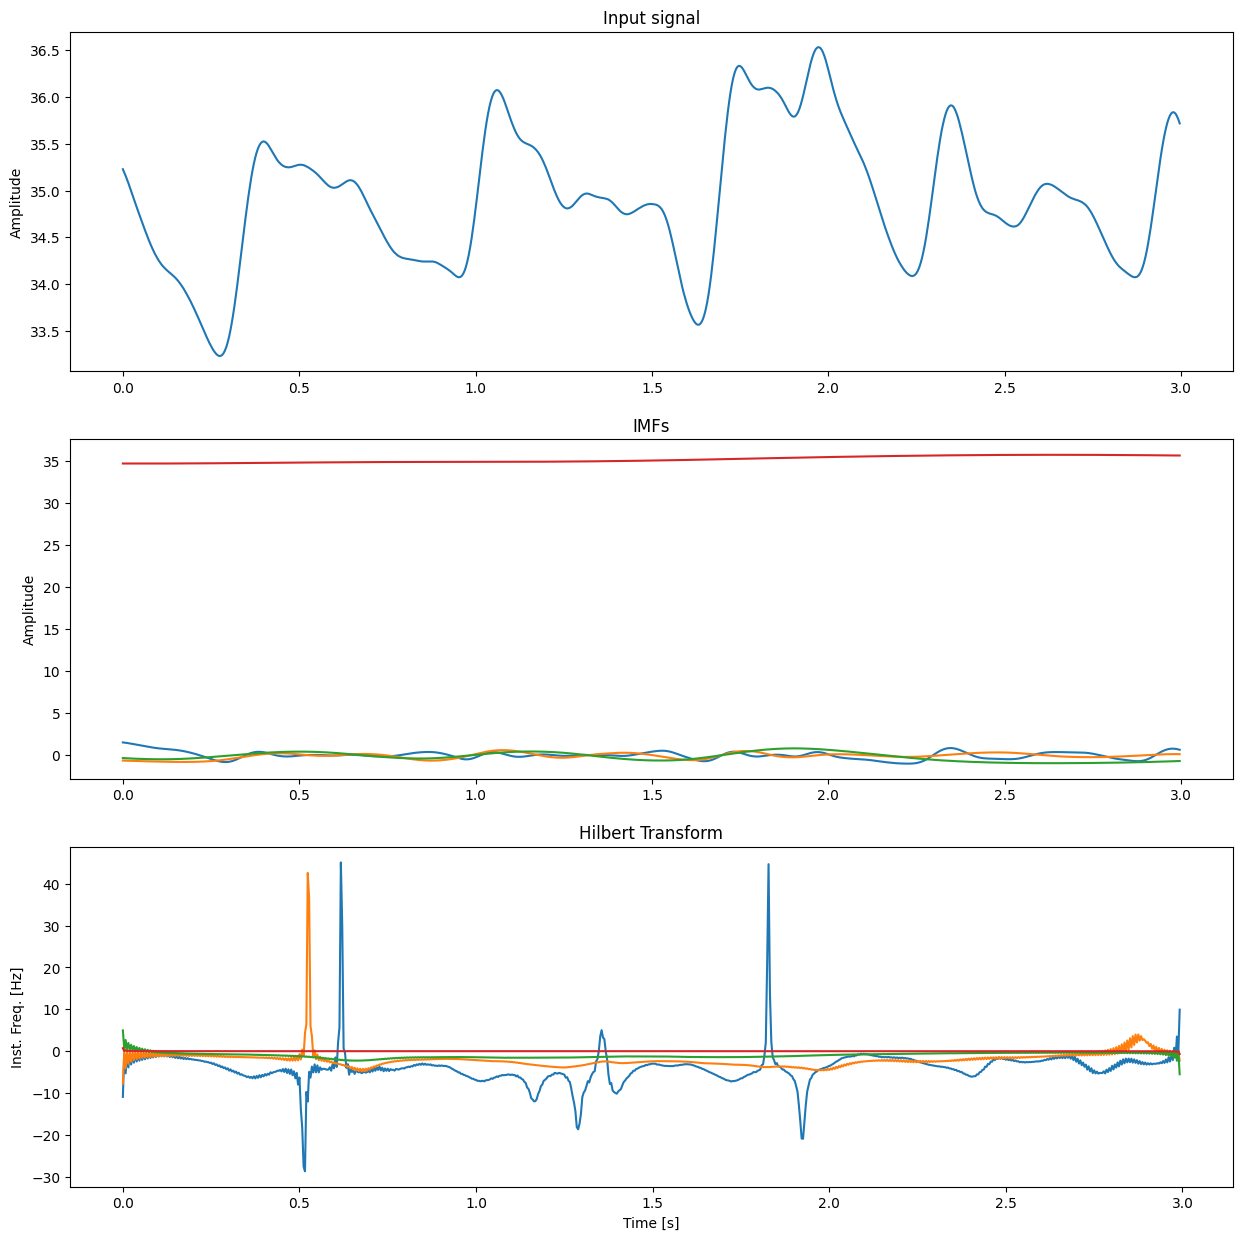

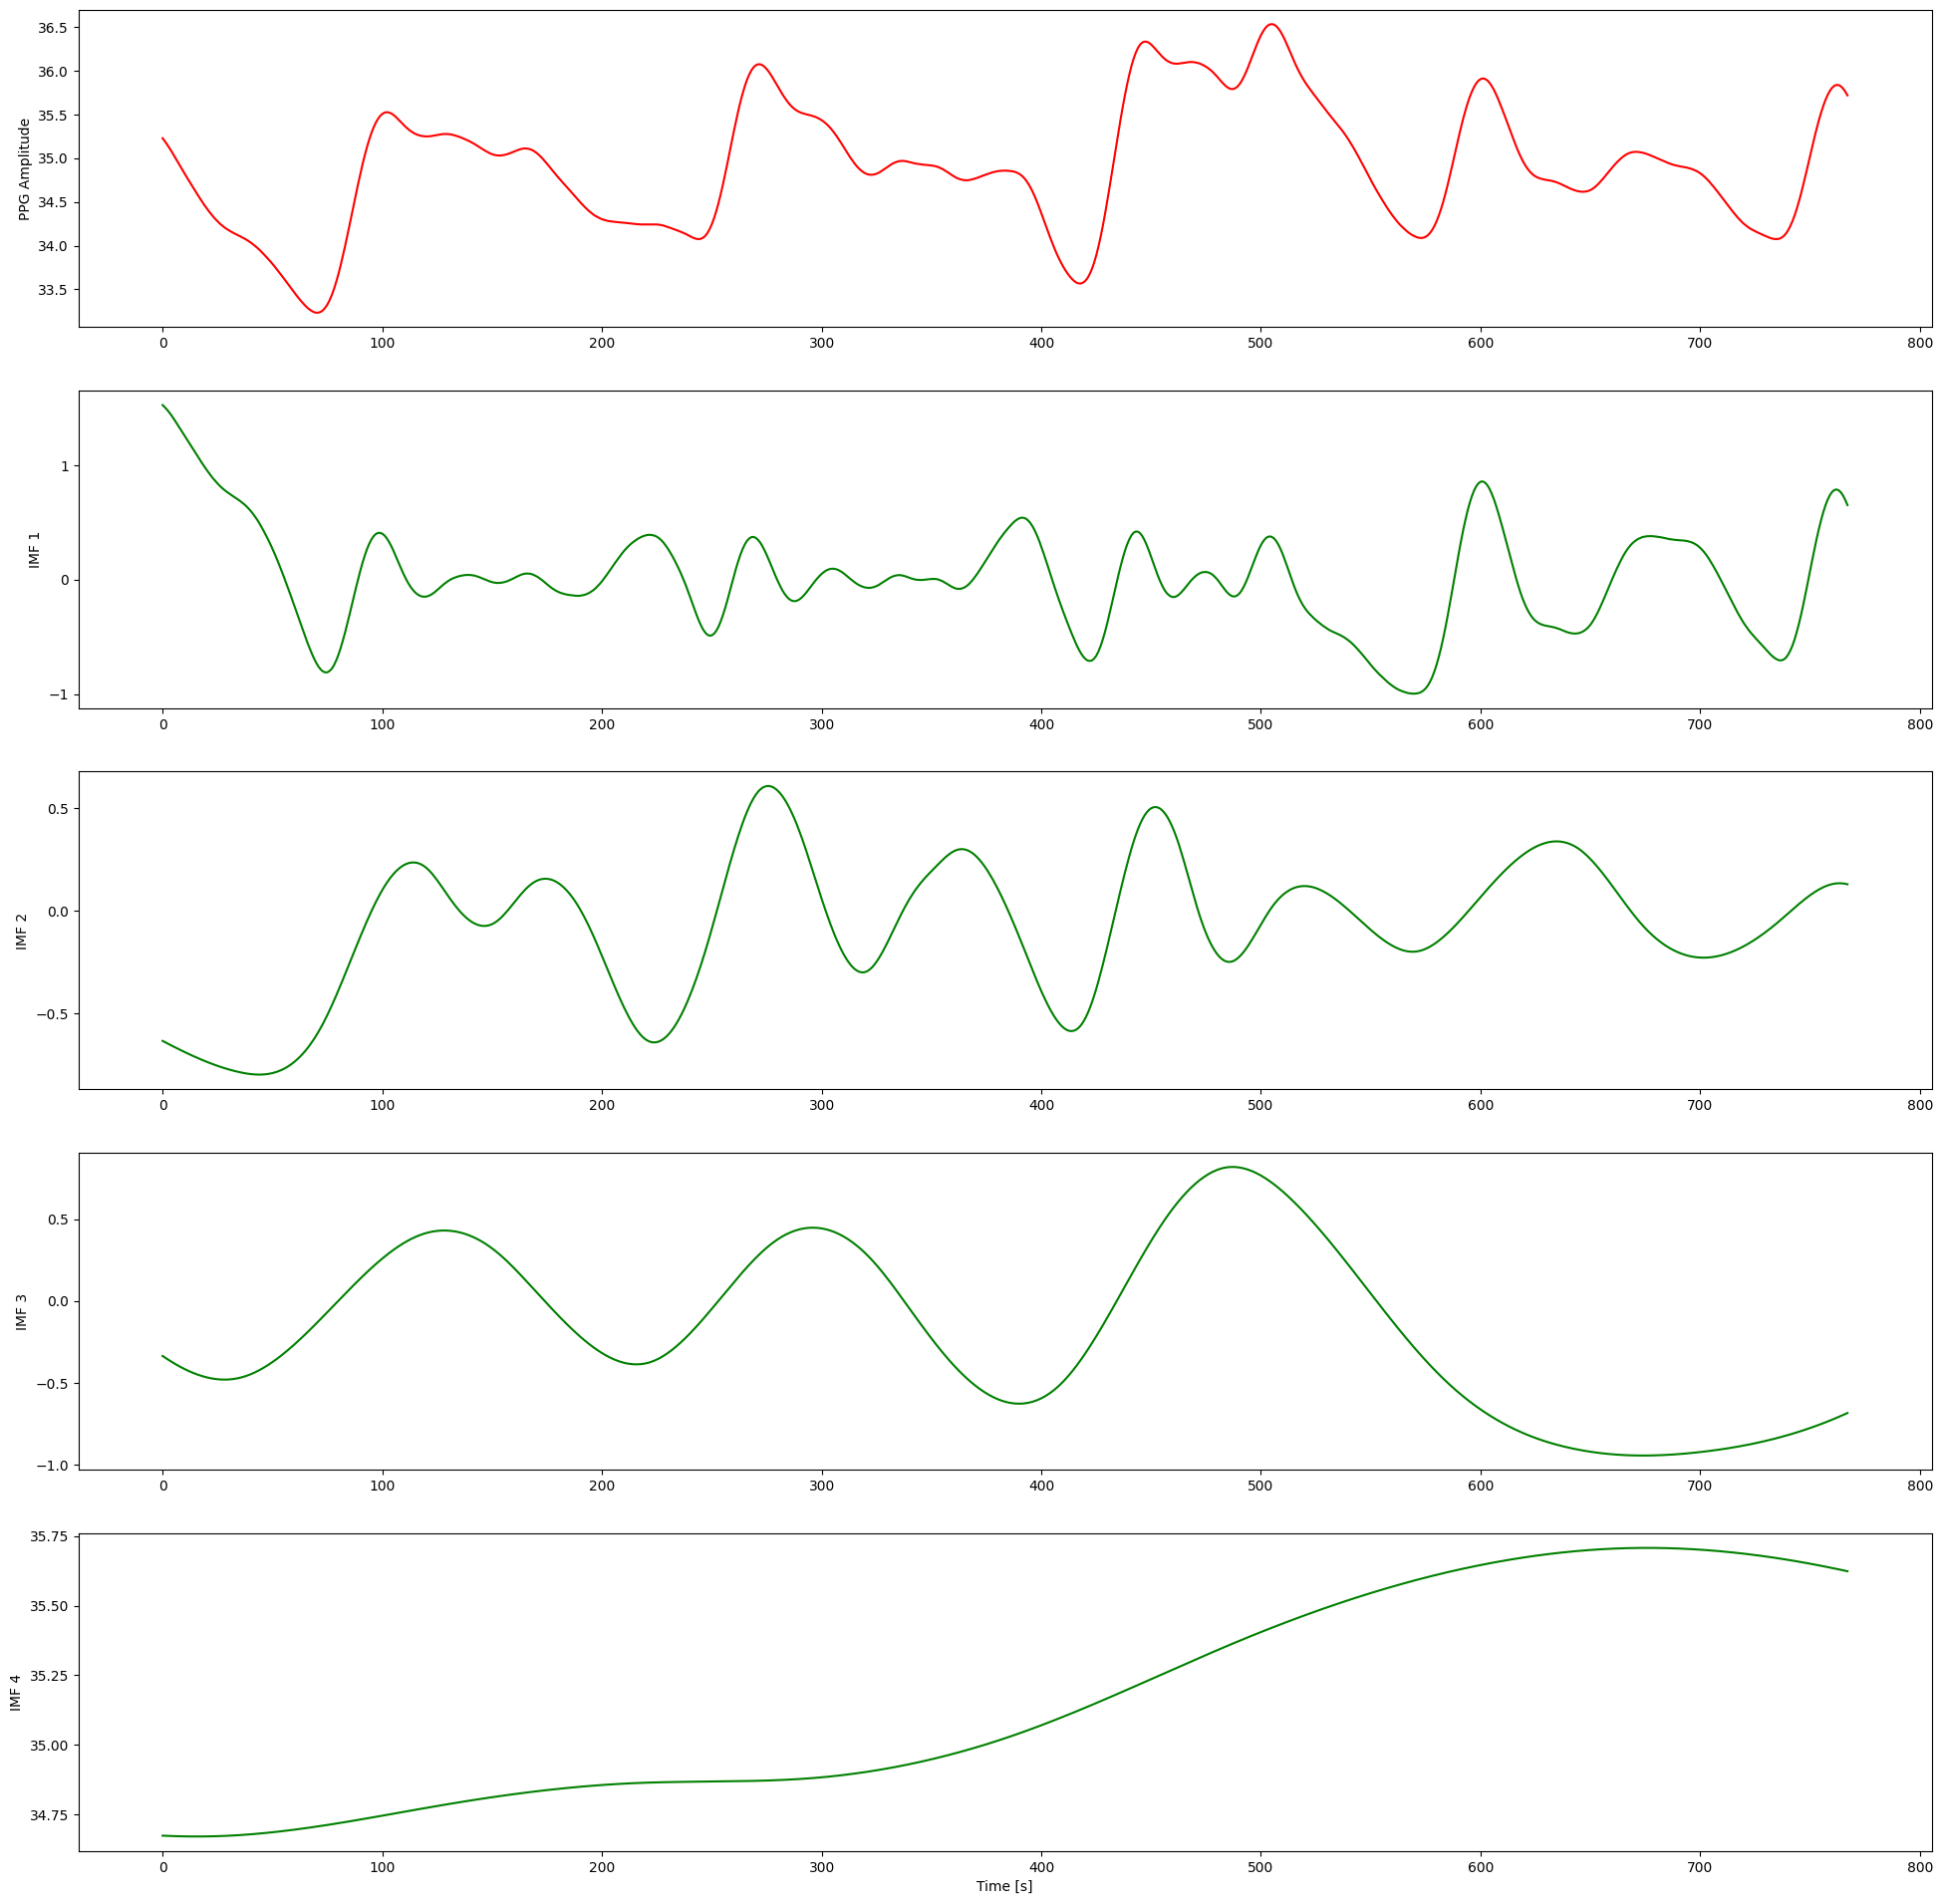

In [16]:
#Repeating the above steps for the high workload dataset
column_1_high = data_file_high['Trial 3:3back'].iloc[0:768]
signal_2 = column_1_high.values
time_series = np.arange(len(column_1_high))/sampling_rate

#Computing Intrinsic Mode Functions using EMD
config = {'spline_kind':'cubic', 'MAX_ITERATION':100}
emd = EMD(**config)
imfs = emd(signal_2, max_imf=7)
print('imfs = ' + f'{imfs.shape[0]:4d}')
dt = time_series[0] - time_series[1]

instant_phases = instant_phase(imfs)
instant_freqs = np.diff(instant_phases)/(2*np.pi*dt)

#Create a 3 panel figure showing the input signal, all IMFs, and instantaneous frequencies
fig, axes = plt.subplots(3, figsize = (15,15))

#Input Signal
ax = axes[0]
ax.plot(time_series, signal_2)
ax.set_ylabel("Amplitude")
ax.set_title("Input signal")

#All IMFs
ax = axes[1]
for num, imf in enumerate(imfs):
    ax.plot(time_series, imf, label='IMF %s' %(num + 1))
ax.set_ylabel("Amplitude") 
ax.set_title("IMFs")

#All instantaneous frequencies
ax = axes[2]
for num, instant_freq in enumerate (instant_freqs):
    ax.plot(time_series[:-1], instant_freq, label = 'Freq %s' %(num + 1))   
ax.set_xlabel("Time [s]")
ax.set_ylabel("Inst. Freq. [Hz]")
ax.set_title("Hilbert Transform")

plt.show()

# Plotting all the IMFs alongside the input signal
nIMFs = imfs.shape[0]
plt.figure(figsize=(24,24))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(signal_2, 'r')
plt.ylabel('PPG Amplitude')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(imfs[n], 'g')
    plt.ylabel("IMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.show()